In [ ]:
# скачиваем с гитхаба таблицу, с которой будем работать
! wget https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/data/BikesDataVars.csv

--2024-02-22 09:26:27--  https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/data/BikesDataVars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 591290 (577K) [text/plain]
Saving to: ‘BikesDataVars.csv’

BikesDataVars.csv   100%[===================>] 577.43K  --.-KB/s    in 0.02s   

2024-02-22 09:26:28 (36.5 MB/s) - ‘BikesDataVars.csv’ saved [591290/591290]



За датасет спасибо курсу по анализу данных от Data Culture (НИУ ВШЭ)

А вот [**тут**](https://dfedorov.spb.ru/pandas/#8) есть безумное количество материалов по питону для анализа данных, хорошо написанных и проиллюстрированных

# Краткая статистическая справка для pandas

Бывает **описательная статистика**, которая обрабатывает, систематизирует имеющиеся данные (+ наглядно представляет). И бывает **статистика вывода**, которая пытается на основе данных (выборки) делать предсказания о генеральной совокупности.

В этой тетрадке про описательную.

In [ ]:
import pandas as pd

bikes = pd.read_csv('BikesDataVars.csv')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,False,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,False,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,False,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,False,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,False,0


In [ ]:
# краткая информация про столбцы
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  8760 non-null   object 
 1   Hour                  8760 non-null   int64  
 2   Temperature           8581 non-null   float64
 3   Humidity              8760 non-null   int64  
 4   Wind speed            8760 non-null   float64
 5   Rainfall              8760 non-null   float64
 6   Snowfall              8760 non-null   float64
 7   Seasons               8760 non-null   object 
 8   Holiday               8760 non-null   int64  
 9   Functioning Day       8760 non-null   bool   
 10  Rental Count          8760 non-null   int64  
 11  Normal Humidity       8760 non-null   int64  
 12  Temperature Category  8581 non-null   object 
 13  Windy                 8760 non-null   bool   
 14  Good Weather          8760 non-null   int64  
dtypes: bool(2), float64(4

In [ ]:
# основная описательная статистика по числовым столбцам
bikes.describe()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Rental Count,Normal Humidity,Good Weather
count,8760.000000,8581.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.00000,8760.000000
mean,11.500000,12.878557,58.226256,1.724909,0.148687,0.075068,0.049315,696.582078,0.34532,0.092694
std,6.922582,11.955551,20.362413,1.036300,1.128193,0.436746,0.216537,749.812613,0.47550,0.290020
min,0.000000,-17.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,5.750000,3.400000,42.000000,0.900000,0.000000,0.000000,0.000000,157.000000,0.00000,0.000000
50%,11.500000,13.700000,57.000000,1.500000,0.000000,0.000000,0.000000,425.500000,0.00000,0.000000
75%,17.250000,22.500000,74.000000,2.300000,0.000000,0.000000,0.000000,1009.000000,1.00000,0.000000
max,23.000000,39.400000,98.000000,7.400000,35.000000,8.800000,1.000000,6012.000000,1.00000,1.000000


### Меры центральной тенденции

In [ ]:
# среднее
bikes['Temperature'].mean()

12.878557277706562

In [ ]:
# медиана
bikes['Temperature'].median()

13.7

In [ ]:
# мода
bikes['Humidity'].mode()

0    53
1    97
Name: Humidity, dtype: int64

In [ ]:
# как найти моду руками
bikes['Humidity'].value_counts()  # и смотреть на самые верхние

Humidity
53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: count, Length: 90, dtype: int64

<Axes: >

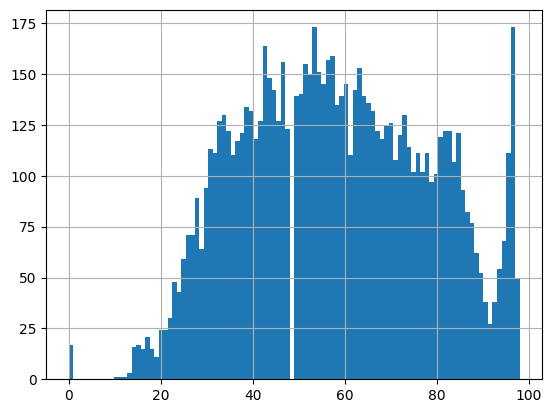

In [ ]:
# нарисовать гистограмму по столбику
bikes['Humidity'].hist(bins=100)

<Axes: >

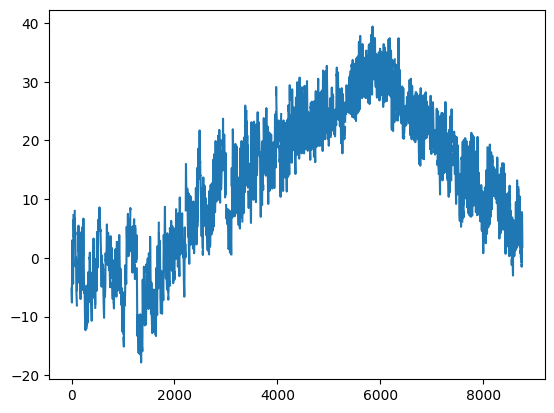

In [ ]:
# нарисовать линейную диаграмму по столбику
bikes['Temperature'].plot()

### Группировка данных

In [ ]:
# в какое время сколько в среднем берут велосипедов?
bikes.groupby('Hour')['Rental Count'].mean()

Hour
0      558.178082
1      415.720548
2      319.767123
3      201.010959
4      122.838356
5      135.863014
6      283.654795
7      612.646575
8      979.838356
9      642.136986
10     519.123288
11     585.336986
12     710.534247
13     700.706849
14     747.147945
15     796.084932
16     938.032877
17    1128.873973
18    1518.983562
19    1168.328767
20    1069.698630
21     997.942466
22     893.621918
23     671.898630
Name: Rental Count, dtype: float64

<Axes: xlabel='Hour'>

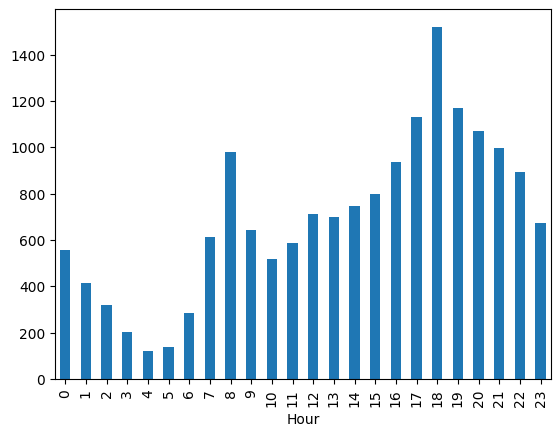

In [ ]:
# нарисовать столбчатую диаграмму
bikes.groupby('Hour')['Rental Count'].mean().plot(kind='bar')

In [ ]:
# в какое время сколько в зависимости от наличия Good Weather
# в среднем берут велосипедов
bikes.groupby(['Hour', 'Good Weather'])['Rental Count'].mean()

Hour  Good Weather
0     0                514.797619
      1               1060.793103
1     0                399.179941
      1                631.384615
2     0                304.476608
      1                547.130435
3     0                193.178161
      1                361.352941
4     0                119.467236
      1                207.357143
5     0                131.218487
      1                343.125000
6     0                279.243017
      1                509.285714
7     0                604.888571
      1                793.666667
8     0                957.336336
      1               1214.000000
9     0                598.072327
      1                940.276596
10    0                478.721154
      1                756.962264
11    0                514.022801
      1                962.810345
12    0                664.558065
      1                969.672727
13    0                674.304075
      1                883.804348
14    0                736.63

<Axes: ylabel='Hour'>

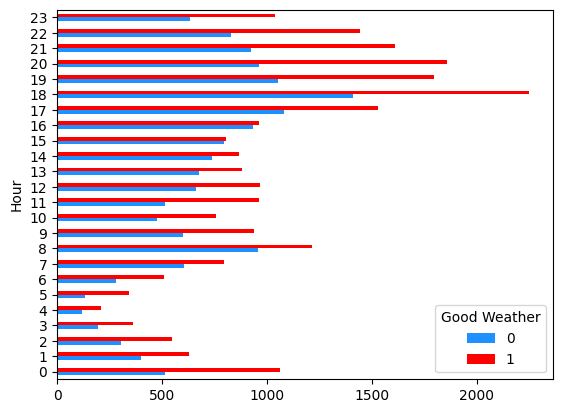

In [ ]:
# нарисовать столбчатую диаграмму
bikes.groupby(['Hour', 'Good Weather'])['Rental Count'].mean().unstack().plot.barh(color=['dodgerblue', 'red'])

In [ ]:
# какая мода по 'Temperature Category' в каждом из сезонов?
# вот так не работает
bikes.groupby('Seasons')['Temperature Category'].mode()

AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

In [ ]:
bikes.groupby('Seasons')['Temperature Category'].value_counts()

Seasons  Temperature Category
Autumn   Chilly                  1138
         Nice                     894
         Hot                       86
         Freezing                  20
Spring   Chilly                  1224
         Nice                     881
         Hot                       27
         Freezing                  22
Summer   Hot                     1166
         Nice                    1003
Winter   Freezing                1370
         Chilly                   750
Name: count, dtype: int64

`.agg()` - для агрегирования, применения функции(ий)

In [ ]:
bikes.groupby('Seasons')['Temperature Category'].agg(pd.Series.mode)

Seasons
Autumn      Chilly
Spring      Chilly
Summer         Hot
Winter    Freezing
Name: Temperature Category, dtype: object

In [ ]:
def get_mode(x):  # не идеально, не позволяет получить больше одной моды
    return x.value_counts().index[0]

bikes.groupby('Seasons')['Temperature Category'].agg(get_mode)

Seasons
Autumn      Chilly
Spring      Chilly
Summer         Hot
Winter    Freezing
Name: Temperature Category, dtype: object

In [ ]:
bikes.groupby('Seasons')['Temperature'].mean()

Seasons
Autumn    14.138821
Spring    13.038533
Summer    26.574827
Winter    -2.567783
Name: Temperature, dtype: float64

In [ ]:
# то же самое
bikes.groupby('Seasons')['Temperature'].agg('mean')

Seasons
Autumn    14.138821
Spring    13.038533
Summer    26.574827
Winter    -2.567783
Name: Temperature, dtype: float64

In [ ]:
# .agg() позволяет применить несколько функций сразу
bikes.groupby('Seasons')['Temperature'].agg(func=['mean', 'median'])

,mean,median
Seasons,,
Autumn,14.138821,13.8
Spring,13.038533,13.3
Summer,26.574827,26.6
Winter,-2.567783,-2.2


`.pivot_table()` - сводная таблица

[вот тут картинка про сводные таблицы и синтаксис](http://dfedorov.spb.ru/pandas/%D0%A1%D0%B2%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%20%D0%B2%20pandas.html)

In [ ]:
bikes.pivot_table(index='Hour',
                  values=['Temperature', 'Rental Count'],
                  aggfunc=['mean', 'median'])

mean                   median            
     Rental Count Temperature Rental Count Temperature
Hour                                                  
0      558.178082   11.253652        433.0       11.80
1      415.720548   10.972145        329.0       11.50
2      319.767123   10.542535        239.0       10.90
3      201.010959   10.355462        165.0       10.70
4      122.838356   10.069859         94.0       10.40
5      135.863014    9.849580        107.0       10.00
6      283.654795    9.763944        193.0       10.00
7      612.646575    9.454062        410.0        9.60
8      979.838356    9.988515        762.0       10.40
9      642.136986   11.459669        519.0       12.10
10     519.123288   12.766947        414.0       14.00
11     585.336986   14.285434        485.0       16.40
12     710.534247   15.417175        572.0       17.40
13     700.706849   16.184765        586.0       18.30
14     747.147945   16.862360        567.0       19.10
15     796.084932   17.084358        678.0       19.20
16     938.032877   16.821652        804.0       18.80
17    1128.873973   16.325281        899.0       18.40
18    1518.983562   15.255956       1154.0       16.80
19    1168.328767   14.254062        845.0       15.20
20    1069.698630   13.394460        721.0       14.10
21     997.942466   12.680165        688.0       13.40
22     893.621918   12.281461        649.0       12.95
23     671.898630   11.717416        516.0       12.25

## Меры разброса

<Axes: >

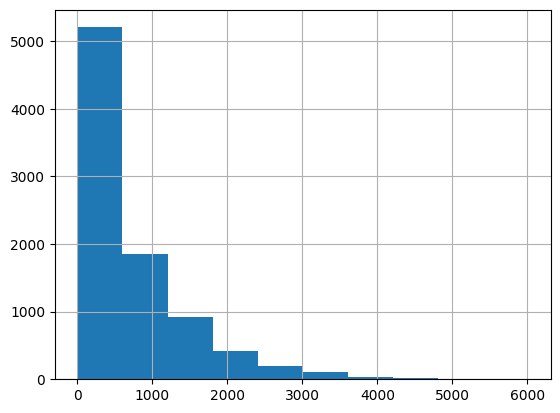

In [ ]:
bikes['Rental Count'].hist()

In [ ]:
bikes['Rental Count'].min(), bikes['Rental Count'].max()

(0, 6012)

In [ ]:
# размах
bikes['Rental Count'].max() - bikes['Rental Count'].min()

6012

In [ ]:
import numpy as np

In [ ]:
# перцентили-квантили
print(np.percentile(bikes['Rental Count'], 25))
print(np.quantile(bikes['Rental Count'], 0.25))

157.0
157.0


In [ ]:
print(np.percentile(bikes['Rental Count'], 30))


196.0


<Axes: >

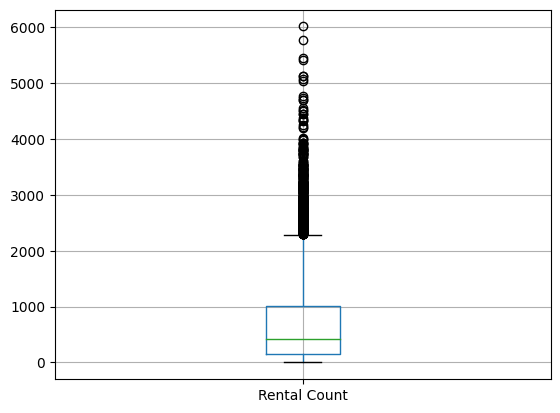

In [ ]:
bikes.boxplot(['Rental Count'])

Что это значит?
![img](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/iqr.jpeg)

In [ ]:
# интерквартильный размах
np.percentile(bikes['Rental Count'], 75) - np.percentile(bikes['Rental Count'], 25)

852.0

Дисперсия генеральной совокупности = (Σ(𝑋−μ)^2)/𝑁

Дисперсия выборки = (Σ(𝑋−𝑀)^2)/(𝑛−1)

μ и 𝑀 - обозначения ср.арифметического генеральной совокупности и выборки

In [ ]:
# дисперсия выборки
bikes['Rental Count'].var()

562218.9547877825

In [ ]:
# стандартное отклонение выборки (квадратный корень дисперсии выборки)
bikes['Rental Count'].std(ddof=1)

749.8126131159588

In [ ]:
# дисперсия и стандартное отклонение генеральной совокупности
# ddof - кол-во степеней свободы (Используется в n-ddof)

print(bikes['Rental Count'].var(ddof=0))
print(bikes['Rental Count'].std(ddof=0))

562154.7745418021
749.7698143709189


In [ ]:
# функция для размаха
def range_values(x):
    return x.max() - x.min()

In [ ]:
# сводная таблица
bikes.pivot_table(index='Hour',
                  values=['Temperature', 'Rental Count'],
                  aggfunc=['mean', 'std', 'var', range_values])

mean                      std                       var  \
     Rental Count Temperature Rental Count Temperature  Rental Count   
Hour                                                                   
0      558.178082   11.253652   455.016192   11.437803  2.070397e+05   
1      415.720548   10.972145   338.058896   11.391632  1.142838e+05   
2      319.767123   10.542535   268.797389   11.411300  7.225204e+04   
3      201.010959   10.355462   162.601701   11.306762  2.643931e+04   
4      122.838356   10.069859   106.375778   11.284178  1.131581e+04   
5      135.863014    9.849580   113.191916   11.310231  1.281241e+04   
6      283.654795    9.763944   273.636723   11.323973  7.487706e+04   
7      612.646575    9.454062   582.515881   11.487845  3.393248e+05   
8      979.838356    9.988515   871.005983   11.931827  7.586514e+05   
9      642.136986   11.459669   500.018849   12.199029  2.500188e+05   
10     519.123288   12.766947   415.278139   12.148809  1.724559e+05   
11     585.336986   14.285434   452.773454   12.038602  2.050038e+05   
12     710.534247   15.417175   538.838247   11.929531  2.903467e+05   
13     700.706849   16.184765   539.252891   11.833386  2.907937e+05   
14     747.147945   16.862360   613.267340   11.825084  3.760968e+05   
15     796.084932   17.084358   631.989742   11.872539  3.994110e+05   
16     938.032877   16.821652   744.642450   11.798065  5.544924e+05   
17    1128.873973   16.325281   935.173622   12.080028  8.745497e+05   
18    1518.983562   15.255956  1286.770715   12.154047  1.655779e+06   
19    1168.328767   14.254062  1088.371072   11.847401  1.184552e+06   
20    1069.698630   13.394460   995.999725   11.656540  9.920155e+05   
21     997.942466   12.680165   916.900635   11.480006  8.407068e+05   
22     893.621918   12.281461   787.161188   11.480268  6.196227e+05   
23     671.898630   11.717416   581.424225   11.345552  3.380541e+05   

                 range_values              
     Temperature Rental Count Temperature  
Hour                                       
0     130.823339         2059        48.0  
1     129.769278         1485        47.8  
2     130.217762         1950        47.5  
3     127.842870          781        47.2  
4     127.332677          608        47.5  
5     127.921327          561        47.6  
6     128.232369         1577        47.9  
7     131.970580         2880        48.0  
8     142.368491         4438        49.6  
9     148.816319         2318        50.5  
10    147.593567         1740        50.9  
11    144.927933         2041        51.4  
12    142.313704         2239        51.2  
13    140.029017         2805        51.2  
14    139.832607         3163        50.8  
15    140.957178         3194        50.7  
16    139.194330         3671        50.6  
17    145.927077         4450        50.8  
18    147.720860         6012        50.8  
19    140.360917         5418        49.9  
20    135.874914         3857        48.8  
21    131.790545         4373        48.0  
22    131.796557         3432        48.1  
23    128.721555         2603        48.1

## Выбросы

Порог, после которого идут выбросы - договорённость.

Обычно: до `Q1 - 1.5 * IQR` и после `Q3 + 1.5 * IQR`

In [ ]:
q1 = bikes['Rental Count'].quantile(0.25)
q3 = bikes['Rental Count'].quantile(0.75)
iqr = q3 - q1

In [ ]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr

In [ ]:
# границы
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

-1121.0
2287.0


In [ ]:
# сколько выбросов?
bikes[bikes['Rental Count'] > iqr_outlier_threshold_up].shape

(413, 15)

Иногда: от `mean - 3 * std` до `mean + 3 * std`

In [ ]:
mean = bikes['Rental Count'].mean()
std = bikes['Rental Count'].std()
std_outlier_threshold_bottom = mean - 2.5 * std  # а мы сделаем 2.5
std_outlier_threshold_up = mean + 2.5 * std

In [ ]:
# границы
print(std_outlier_threshold_bottom)
print(std_outlier_threshold_up)

-1177.949455164326
2571.113610415468


In [ ]:
# сколько выбросов?
bikes[bikes['Rental Count'] > std_outlier_threshold_up].shape

(278, 15)

Итого без выбросов:

In [ ]:
iqr_bikes_no_outliers = bikes[bikes['Rental Count'] <= iqr_outlier_threshold_up]
std_bikes_no_outliers = bikes[bikes['Rental Count'] <= std_outlier_threshold_up]

In [ ]:
print(bikes['Rental Count'].mean())  # с выбросами
print(bikes['Rental Count'].median())  # с выбросами

print(iqr_bikes_no_outliers['Rental Count'].mean())
print(iqr_bikes_no_outliers['Rental Count'].median())

print(std_bikes_no_outliers['Rental Count'].mean())
print(std_bikes_no_outliers['Rental Count'].median())

696.5820776255708
425.5
584.146280100635
392.0
613.2393303466164
402.0


Когда мы убираем выбросы, разница между средним и медианой становится меньше.

In [ ]:
print(bikes['Rental Count'].mean() - bikes['Rental Count'].median())  # с выбросами

print(iqr_bikes_no_outliers['Rental Count'].mean() - iqr_bikes_no_outliers['Rental Count'].median())

print(std_bikes_no_outliers['Rental Count'].mean() - std_bikes_no_outliers['Rental Count'].median())

271.08207762557083
192.14628010063495
211.23933034661638
